# Part A - Linear Regression

### Section 1:
#### Research Question: 
Are age, gender and education (edication_num) correlated with hours per week?

### Section 2:

In [2]:
# Deprocations of jupyter warnings about sns functions that will be deprocated in the future. (sns.distplot)
import warnings
warnings.filterwarnings('ignore')

#Reading a CSV file into pandas Dataframe
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import random
from scipy.stats import f
from scipy.stats import t
import pprint

random.seed(1)
# Removing missing values
missing_values = ["n/a", "na", "--","?"]
df_full = pd.read_csv("adult.csv",sep=",", na_values = missing_values)
df_full=df_full.dropna()

# Converting string columns to binary.
df_full['gender'] =df_full['gender'].map({'Female': 0, 'Male': 1})
df_full['income'] = df_full['income'].map({'>50K': 1, '<=50K': 0})

# Reducing dataset size to 200 samples.
df_200_samples=df_full.sample(n = 200)
df_200_samples.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
38723,23,Private,209955,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,1,0,0,40,United-States,0
11897,27,Private,106276,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,0,40,United-States,0
23631,36,Local-gov,217414,Some-college,10,Divorced,Protective-serv,Unmarried,White,1,0,0,55,United-States,0
35694,23,Private,211527,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,1,0,0,60,United-States,0
29117,36,Private,231052,HS-grad,9,Separated,Other-service,Unmarried,Black,0,0,0,35,United-States,0


### Section 3- A and B

We decided to display the data via histogram and boxplot, because histogram discribes the distribution and the symmetry of the data, while boxplot gives more accurate explanation of the outliers, the statistics. 

#### Age: 
There are no missing values. There are outliers in the data (found in range: 70-80 years.)
The distribution is not symmetric (has right tail). We can't estimate the distribution of the data.

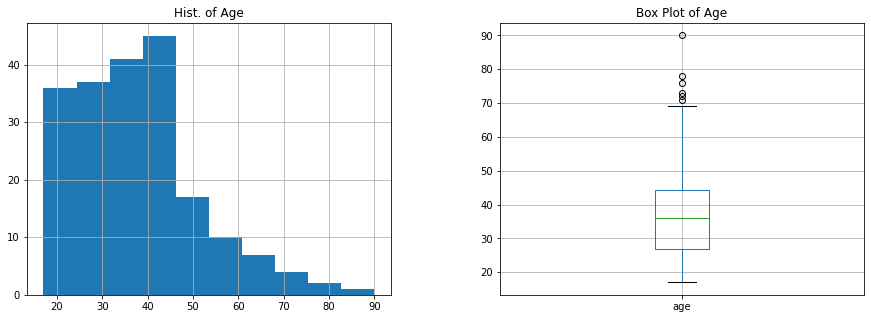

In [26]:
# Plot distribution and statistics of features 
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
df_200_samples.hist(['age'],ax=ax1)
df_200_samples.boxplot(['age'],ax=ax2)
ax1.set_title('Hist. of Age')
ax2.set_title('Box Plot of Age')
plt.show()

#### Education num: 
There are no missing values. There are outliers in the data (found in rannge <=2 - equal to 1st-4th and preschool).
The distribution is not symmetric (has left tail). We can't estimate the distribution of the data.

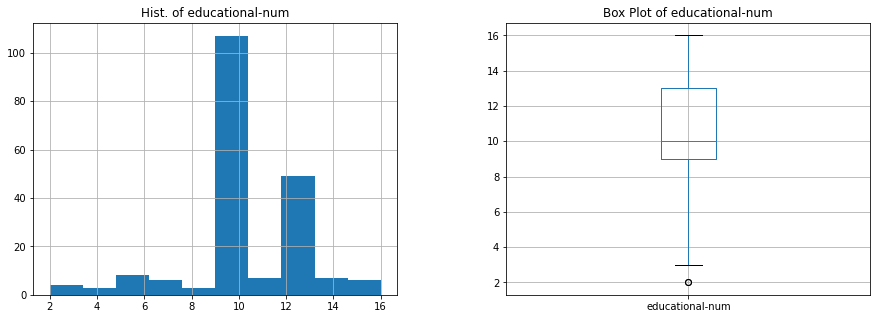

In [27]:
# Plot distribution and statistics of features 
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
df_200_samples.hist(['educational-num'],ax=ax1)
df_200_samples.boxplot(['educational-num'],ax=ax2)
ax1.set_title('Hist. of educational-num')
ax2.set_title('Box Plot of educational-num')
plt.show()

#### Gender:
There are no missing values. There are no outliers. The data comes from bernoulli distribution. We can't assume symmetry or asymmetry in binary data. 

In [28]:
# Distribution of descreete feature - gender
df_200_samples.groupby('gender').size()

gender
0     53
1    147
dtype: int64

#### Hours-per-week: 
There are no missing values. There are alot of outliers in the data.
The distribution is not symmetric even thought most of the data centered in range 30-40. We assume that the data might come from chi square distribution.

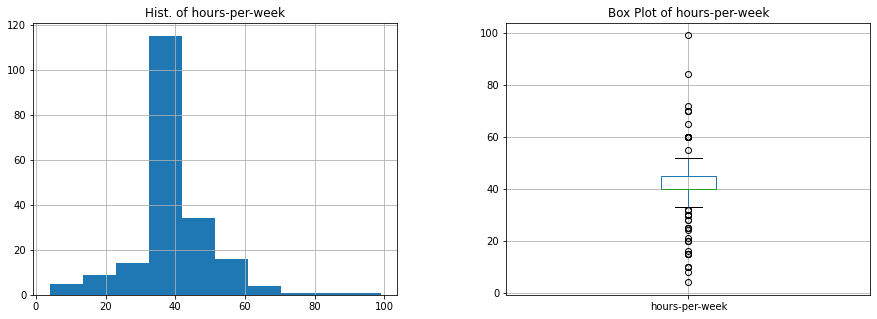

In [29]:
# Plot distribution and statistics of features 
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
df_200_samples.hist(['hours-per-week'],ax=ax1)
df_200_samples.boxplot(['hours-per-week'],ax=ax2)
ax1.set_title('Hist. of hours-per-week')
ax2.set_title('Box Plot of hours-per-week')
plt.show()

### Section 3- C

We used scatterplot to check the correlation between Explanatory variables and response  variable, because we can plot the slope and examine the correltaion in better way then from histogram\boxplot.

As we can see Age is non correlated with hours-per-week. The slope (as we can seen from the plot) is close to be 0.
Educational-num is weackly\non correlated with hours-per-week. The slope (as we can seen from the plot) is positive but not close to be 1.

We would say Educational-num has more influence of hours-per-week, then age. 



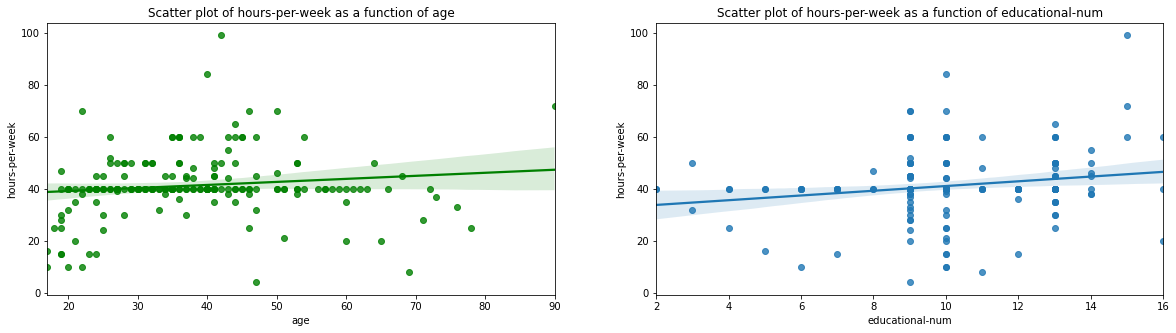

In [30]:
import pandas as pd
import seaborn as sns
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.regplot(df_200_samples[['age']],df_200_samples[['hours-per-week']],ax=ax1,color='g')
sns.regplot(df_200_samples[['educational-num']],df_200_samples[['hours-per-week']],ax=ax2)
ax1.set_title('Scatter plot of hours-per-week as a function of age')
ax2.set_title('Scatter plot of hours-per-week as a function of educational-num')
plt.show()

### Section 3- D

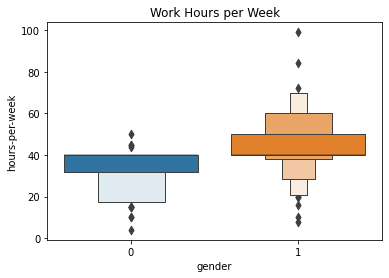

In [31]:
# Work Hours per Week depending on gender.
import seaborn as sns
sns.boxenplot(x='gender',y='hours-per-week',data=df_200_samples)
plt.title("Work Hours per Week")
plt.show()

### Section 4

In [9]:
def redner_df(df):
    df['aux_columns_of_ones']= [1]*df.shape[0]
    df = df[['aux_columns_of_ones','gender','age','educational-num','hours-per-week']]
    return df

def create_targets_and_lables(df_data):
    X=df_data.iloc[:, 0:df_data.shape[1]-1].values
    Y=df_data.iloc[:, df_data.shape[1]-1:].values
    return X,Y

def estimate_beta(df_data):
    X,Y =create_targets_and_lables(df_data)
    beta_est=((np.linalg.inv(X.T@X))@X.T)@Y
    return beta_est

In [33]:
df_full=redner_df(df_full)
df_200_samples=redner_df(df_200_samples)

beta_est_200_samples=estimate_beta(df_200_samples)
print(beta_est_200_samples)

[[24.42725748]
 [ 8.75262566]
 [ 0.06123245]
 [ 0.79190876]]


The result is consistent with the conclusion from the section 3.c). educational-num has more influence of the hours-per-week, then age.
But, gender effects hours-per-week the most.

Increase in one unit in <b>age</b> increases hours-per-week in 0.0344

Increase in one unit in <b>educational-num</b> increases hours-per-week in 1.0261

Increase in one unit in <b>gender</b> increases hours-per-week in 9.211

### Section 5

In [10]:
def create_anova(df_data,beta_est):
    X,Y=create_targets_and_lables(df_data)

    #Calc values from ANOVA table
    SS_res= sum(np.square(Y-X@beta_est))[0]
    SS_reg=sum(np.square(X@beta_est-np.mean(Y)))[0]
    SS_tot=SS_reg+SS_res
    deg_of_freedom=[X.shape[1]-1, X.shape[0]-X.shape[1],X.shape[0]-1]
    MS_reg=SS_reg/deg_of_freedom[0]
    MS_res=SS_res/deg_of_freedom[1]
    F=MS_reg/MS_res

    #Display ANOVA
    anova={'source_of_variation':['Reg','Res','Total'],'ss': [SS_reg,SS_res,SS_tot],'df':deg_of_freedom,'MS': [MS_reg,MS_res,''], 'F':[F,'',''] }
    ANOVA_df= pd.DataFrame.from_dict(anova)
    ANOVA_df.set_index('source_of_variation')
    print(ANOVA_df)
    print('-'*100)
    
    #calc R^2 and R^2_adj
    R_square=1-SS_res/SS_tot
    R_square_adj=1-MS_res/(MS_res+MS_reg)
    print('R^2 is: {}'.format(R_square))
    print('R^2_adj is: {}'.format(R_square_adj))
    print('-'*100)
    
    # Perform F test
    if F>f.ppf([1-0.05], X.shape[1]-1, X.shape[0]-X.shape[1]):
        print('Reject H0 according to F test, while F={}'.format(F))
    else:
        print('H0 cant be rejected')
    return SS_res,SS_reg,SS_tot,MS_reg,MS_res,F
        

In [35]:
SS_res,SS_reg,SS_tot,MS_reg,MS_res,F=create_anova(df_200_samples,beta_est_200_samples)

  source_of_variation            ss   df       MS        F
0                 Reg   4306.208188    3   1435.4  11.1388
1                 Res  25257.546812  196  128.865         
2               Total  29563.755000  199                  
----------------------------------------------------------------------------------------------------
R^2 is: 0.14565836404143861
R^2_adj is: 0.9176195804155916
----------------------------------------------------------------------------------------------------
Reject H0 according to F test, while F=11.138806831098771


### Section 6

In [36]:
#Calculate confidence interval for betas from dataset with 200 samples.
X,Y=create_targets_and_lables(df_200_samples)

C=np.linalg.inv(X.T@X)
var=MS_res*C
CI={}
t_quantile=t.ppf(1-0.05/2, X.shape[0]-X.shape[1])
for i,beta in enumerate(beta_est_200_samples):
    CI["beta_{}".format(i)]=[beta-t_quantile*math.sqrt(var[i][i]),beta+t_quantile*math.sqrt(var[i][i])]
    
print('CI per beta')
pprint.pprint(CI)    

CI per beta
{'beta_0': [array([16.91093932]), array([31.94357565])],
 'beta_1': [array([5.15120266]), array([12.35404866])],
 'beta_2': [array([-0.05773317]), array([0.18019808])],
 'beta_3': [array([0.16087387]), array([1.42294364])]}


In [37]:
beta_origin=estimate_beta(df_full)
print(beta_origin)

[[27.53193839]
 [ 5.75608024]
 [ 0.07104689]
 [ 0.67023432]]


In [38]:
for i,beta in enumerate(beta_origin):
    lower_bound=CI["beta_{}".format(i)][0]
    upper_bound=CI["beta_{}".format(i)][1]
    if lower_bound<=beta<=upper_bound:
        print ("beta_{} = {} is in CI ={}".format(i,beta,CI["beta_{}".format(i)]))
    else:
        print ("beta_{} = {} not in CI ={}".format(i,beta,CI["beta_{}".format(i)]))

beta_0 = [27.53193839] is in CI =[array([16.91093932]), array([31.94357565])]
beta_1 = [5.75608024] is in CI =[array([5.15120266]), array([12.35404866])]
beta_2 = [0.07104689] is in CI =[array([-0.05773317]), array([0.18019808])]
beta_3 = [0.67023432] is in CI =[array([0.16087387]), array([1.42294364])]


### Section 7 - to check

H0: all betas equal to zero

H1: all betas unequal zero

We'll use F statistics. Reject H0 of $F>{F_{(1-\alpha),(p,n-p)}}$

In [39]:
# Perform F test
SS_res,SS_reg,SS_tot,MS_reg,MS_res,F=create_anova(df_200_samples,beta_est_200_samples)

  source_of_variation            ss   df       MS        F
0                 Reg   4306.208188    3   1435.4  11.1388
1                 Res  25257.546812  196  128.865         
2               Total  29563.755000  199                  
----------------------------------------------------------------------------------------------------
R^2 is: 0.14565836404143861
R^2_adj is: 0.9176195804155916
----------------------------------------------------------------------------------------------------
Reject H0 according to F test, while F=11.138806831098771


### Section 8

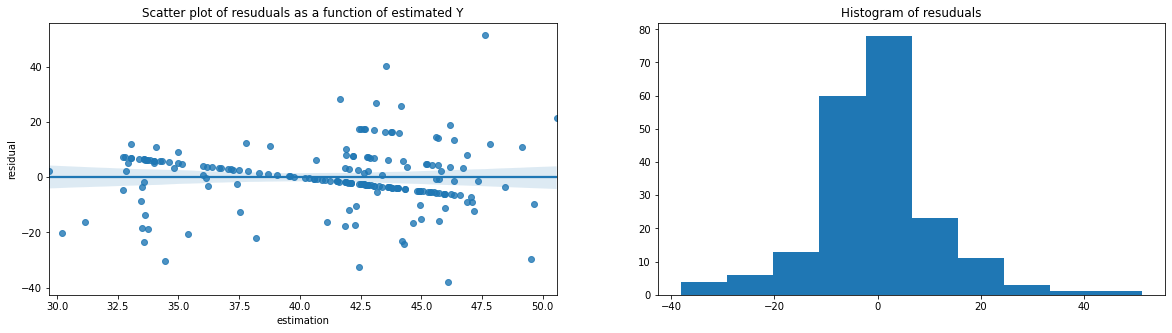

In [40]:
X,Y=create_targets_and_lables(df_200_samples)
beta_est_200_samples=estimate_beta(df_200_samples)

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.regplot(X@beta_est_200_samples,Y-X@beta_est_200_samples,ax=ax1)
ax2.hist(Y-X@beta_est_200_samples)
ax1.set_title('Scatter plot of resuduals as a function of estimated Y')
ax1.set(xlabel='estimation', ylabel='residual')
ax2.set_title('Histogram of resuduals')
plt.show()

##### Linear assumption doesnt hold. The SD is the same all across the plot, because the variables are homoscedastic and unbiased.It is likely that the noise has normal distribution.

### Section 9- a

In [41]:
# Substruct from full data the 200 samples from previous sections.
df_without_sub_sample=df_full.drop(df_200_samples.index)
df_1000_samples=df_without_sub_sample.sample(n = 1000)
X_new,Y_new=create_targets_and_lables(df_1000_samples)

Y_pred=X_new@beta_est_200_samples

### Section 9- b+c

In [42]:
from scipy.stats import norm

#Calculate PI for each predicted y.
z=norm.ppf(1-0.05/2)
C=np.linalg.inv(X_new.T@X_new)
PI={}
num_of_y_in_PI=0
for i,y_pred in enumerate(Y_pred): 
    var=MS_res*(1+X_new[i].T@C@X_new[i])
    PI[i]=[y_pred-z*math.sqrt(var),y_pred+z*math.sqrt(var)]
    if y_pred-z*math.sqrt(var)<=Y_new[i]<=y_pred+z*math.sqrt(var):
        num_of_y_in_PI+=1
sig_level=(num_of_y_in_PI/len(Y_new))*100
print('Significance level = {}%'.format(sig_level))

Significance level = 93.5%


##### By definition of confidence interval,  if we perform a large number of samples, the percentage of samples for which the section to be calculated will include the parameter (Y) is equal to the confidence level (95% for alpha=5%). So we expect SI to be close to 95%.


### Section 10

In [43]:
df_model2=df_200_samples.copy(deep=False)

df_model2['Z12']= df_model2['gender']*df_model2['age']
df_model2['Z13']= df_model2['gender']*df_model2['educational-num']
df_model2['Z23']= df_model2['age']*df_model2['educational-num']
df_model2 = df_model2[['aux_columns_of_ones','Z12','Z13','Z23','gender','age','educational-num','hours-per-week']]

df_model2.head()

,aux_columns_of_ones,Z12,Z13,Z23,gender,age,educational-num,hours-per-week
13105,1,68,14,952,1,68,14,45
41735,1,54,6,324,1,54,6,40
14428,1,0,0,460,0,46,10,40
48290,1,43,14,602,1,43,14,55
7394,1,27,12,324,1,27,12,40


In [44]:
X_2,Y_2=create_targets_and_lables(df_model2)
X_1,Y_1=create_targets_and_lables(df_200_samples)

beta_est_2=estimate_beta(df_model2)
beta_est_1=estimate_beta(df_200_samples)

Y_pred_2=X_2@beta_est_2

In [45]:
SS_res_1,SS_reg_1,SS_tot_1,MS_reg_1,MS_res_1,F_1=create_anova(df_200_samples,beta_est_1)
SS_res_2,SS_reg_2,SS_tot_2,MS_reg_2,MS_res_2,F_2=create_anova(df_model2,beta_est_2)

  source_of_variation            ss   df       MS        F
0                 Reg   4306.208188    3   1435.4  11.1388
1                 Res  25257.546812  196  128.865         
2               Total  29563.755000  199                  
----------------------------------------------------------------------------------------------------
R^2 is: 0.14565836404143861
R^2_adj is: 0.9176195804155916
----------------------------------------------------------------------------------------------------
Reject H0 according to F test, while F=11.138806831098771
  source_of_variation            ss   df       MS        F
0                 Reg   4721.929671    6  786.988  6.11423
1                 Res  24841.825329  193  128.714         
2               Total  29563.755000  199                  
----------------------------------------------------------------------------------------------------
R^2 is: 0.15972022738705804
R^2_adj is: 0.8594367329789866
-------------------------------------------------

##### Mallow's Cp to choose model

In [46]:
Cp1=SS_reg+2*(X_1.shape[1]-1)*((MS_res_1)**2)
Cp2=SS_reg_2+2*(X_2.shape[1]-1)*((MS_res_2)**2)

print(Cp1)
print(Cp2)

if Cp1>Cp2:
    print('Model 2 (with interactions) is better')
if Cp1<=Cp2:
    print('Model 1 is better')


103943.39128107339
203529.8286242738
Model 1 is better


In [47]:
def get_AIC(beta,X,Y,MSE):
    log_likelihood=-(X.shape[0]/2)*math.log(2*math.pi)-X.shape[0]*math.log(MSE)
    last_part_of_eq=0
    for x,y in zip(X,Y):
        last_part_of_eq += (y-beta.T@x)**2
    log_likelihood=log_likelihood-last_part_of_eq/(2*(MSE**2))
    aic=log_likelihood-(X.shape[1]-1)
    return aic

aic2=get_AIC(beta_est_2,X_2,Y_2,MS_res_2)[0]
aic1=get_AIC(beta_est_1,X_1,Y_1,MS_res_1)[0]

print(aic1)
print(aic2)

if aic1<aic2:
    print('Model 2 (with interactions) is better')
if aic1>=aic2:
    print('Model 1 is better')

-1159.3013151057191
-1162.0561957108494
Model 1 is better


##### Model 1 is preffered according to AIC and Mallow's Cp, the result is consistent with the lemma we proved in HW5

# Part B - Logistic Regression

### Section 1:
#### Research Question: 
Are age, gender and education (edication_num) correlated with income?

### Section 2:

In [72]:
# Removing missing values
missing_values = ["n/a", "na", "--","?"]
df_full = pd.read_csv("adult.csv",sep=",", na_values = missing_values)
df_full=df_full.dropna()

# Converting string columns to binary.
df_full['gender'] =df_full['gender'].map({'Female': 0, 'Male': 1})
df_full['income'] = df_full['income'].map({'>50K': 1, '<=50K': 0})

# Reducing dataset size to 200 samples.
df_200_samples=df_full.sample(n = 200)
df_200_samples.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
44688,53,Private,95540,Some-college,10,Divorced,Adm-clerical,Unmarried,White,0,1471,0,40,United-States,0
33521,52,Private,180142,Masters,14,Married-civ-spouse,Tech-support,Husband,White,1,0,0,45,United-States,0
39402,23,Private,105617,9th,5,Never-married,Transport-moving,Own-child,White,1,0,0,40,United-States,0
42649,34,Private,381153,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,40,United-States,1
37502,47,Self-emp-not-inc,158451,Some-college,10,Divorced,Other-service,Not-in-family,White,0,0,0,45,United-States,0


### Section 3- A and B

All the variables except income described at part a of the exercise.

#### Income:
There are no missing values. There are no outliers. We can't assume symmetry or asymmetry in binary data. 

In [73]:
# Distribution of descreete feature - gender
df_200_samples.groupby('income').size()

income
0    157
1     43
dtype: int64

### Section 4
We used scatterplot to check the correlation between Explanatory variables and response variable, because we can plot the slope and examine the correltaion in better way then from histogram\boxplot.

As we can see neither Age nor educational-num are strongly-positive correlated with income. The slope tends to 0.

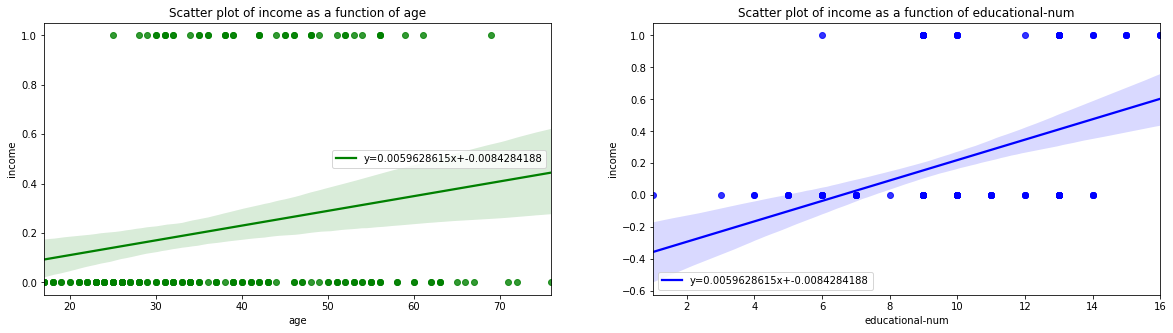

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# get coeffs of linear fit
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df_200_samples['age'],df_200_samples['income'])
# use line_kws to set line label for legend
sns.regplot(x="age", y="income", data=df_200_samples, color='g', 
 line_kws={'label':"y={0:.10f}x+{1:.10f}".format(slope1,intercept1)}, ax=ax1)


slope, intercept, r_value, p_value, std_err = stats.linregress(df_200_samples['age'],df_200_samples['income'])
sns.regplot(x="educational-num", y="income", data=df_200_samples, color='b', 
line_kws={'label':"y={0:.10f}x+{1:.10f}".format(slope,intercept)}, ax=ax2)

ax1.set_title('Scatter plot of income as a function of age')
ax2.set_title('Scatter plot of income as a function of educational-num')

ax1.legend()
ax2.legend()
plt.show()

In [75]:
def redner_df(df):
    df['aux_columns_of_ones']= [1]*df.shape[0]
    df = df[['aux_columns_of_ones','gender','age','educational-num','income']]
    return df

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

df_full=redner_df(df_full)
df_200_samples=redner_df(df_200_samples)

X_sampled,Y_sampled=create_targets_and_lables(df_200_samples)
model=LogisticRegression(random_state=0).fit(X_sampled,Y_sampled.ravel())
beta_est=model.coef_[0]
print(beta_est)

[1.82330044e-05 1.43356298e+00 3.46459079e-02 4.25807443e-01]


Increase in one unit in <b>age</b> increases OR  by exp^(4.097)

Increase in one unit in <b>educational-num</b> increases OR  by exp^(2.568)

Increase in one unit in <b>gender increases</b> income OR  by exp^(1.323)

### Section 5

In [77]:
Y_pred = model.predict_proba(X_sampled)

# Initiate matrix of 0's, fill diagonal with each predicted observation's variance
V = np.diagflat(np.product(Y_pred, axis=1))

var_beta_est = np.linalg.inv(X_sampled.T @ V @ X_sampled)

CI={}
t_quantile=t.ppf(1-0.05/2, X_sampled.shape[0]-X_sampled.shape[1])
for i,beta in enumerate(beta_est):
    CI["beta_{}".format(i)]=[beta-t_quantile*math.sqrt(var_beta_est[i][i]),beta+t_quantile*math.sqrt(var_beta_est[i][i])]
    
print('CI per beta')
pprint.pprint(CI)    


CI per beta
{'beta_0': [-2.5697788834198674, 2.5698153494287483],
 'beta_1': [0.36724853385120393, 2.49987742782391],
 'beta_2': [0.004990819323081992, 0.06430099650388693],
 'beta_3': [0.25211987547358805, 0.5994950114596922]}


In [78]:
beta_origin=estimate_beta(df_full)
print(beta_origin)

[[-0.69272593]
 [ 0.18209858]
 [ 0.00681502]
 [ 0.0548443 ]]


In [79]:
for i,beta in enumerate(beta_origin):
    lower_bound=CI["beta_{}".format(i)][0]
    upper_bound=CI["beta_{}".format(i)][1]
    if lower_bound<=beta[0]<=upper_bound:
        print ("beta_{} = {} is in CI ={}".format(i,beta[0],CI["beta_{}".format(i)]))
    else:
        print ("beta_{} = {} not in CI ={}".format(i,beta[0],CI["beta_{}".format(i)]))

beta_0 = -0.6927259305961198 is in CI =[-2.5697788834198674, 2.5698153494287483]
beta_1 = 0.18209858238889542 not in CI =[0.36724853385120393, 2.49987742782391]
beta_2 = 0.00681501607237147 is in CI =[0.004990819323081992, 0.06430099650388693]
beta_3 = 0.05484430022976007 not in CI =[0.25211987547358805, 0.5994950114596922]


### Section 6

In [80]:
df_model2=df_200_samples.copy(deep=False)

df_model2['Z12']= df_model2['gender']*df_model2['age']
df_model2['Z13']= df_model2['gender']*df_model2['educational-num']
df_model2['Z23']= df_model2['age']*df_model2['educational-num']
df_model2 = df_model2[['aux_columns_of_ones','Z12','Z13','Z23','gender','age','educational-num','income']]

df_model2.head()

,aux_columns_of_ones,Z12,Z13,Z23,gender,age,educational-num,income
44688,1,0,0,530,0,53,10,0
33521,1,52,14,728,1,52,14,0
39402,1,23,5,115,1,23,5,0
42649,1,34,9,306,1,34,9,1
37502,1,0,0,470,0,47,10,0


In [81]:
X_sampled_2,Y_sampled_2=create_targets_and_lables(df_model2)
model2=LogisticRegression(random_state=0).fit(X_sampled_2,Y_sampled_2.ravel())
beta_est2=model2.coef_[0]
print(beta_est2)

[-1.01018653  0.01580996  0.09143339  0.01076988 -0.01214197 -0.09120411
 -0.1056569 ]


In [82]:
from scipy.stats import chi2

def get_ll(beta,X,Y):
    log_likelihood_for_beta=0
    for x,y in zip(X,Y):
        pi=np.exp(beta.T@x)/(1+np.exp(beta.T@x))
        log_likelihood_for_beta+=y*np.log(pi)+(1-y)*np.log(1-pi)
    return log_likelihood_for_beta


chi2=chi2.ppf(0.05, 4)

log_likelihood_for_model2=get_ll(beta_est2,X_sampled_2,Y_sampled_2)[0]
log_likelihood_for_model1=get_ll(beta_est,X_sampled,Y_sampled)[0]

print(log_likelihood_for_model1)
print(log_likelihood_for_model2)
ratio=2*(log_likelihood_for_model1-log_likelihood_for_model2)

print('lambda={}'.format(ratio))


if ratio>=chi2:
    print('Reject H0 -> model 2 (with interactions) is better')
else:
    print('Cant Reject H0 -> model 1 is better')

-976.1602364503464
-105.32171859007532
lambda=-1741.677035720542
Cant Reject H0 -> model 1 is better


In [83]:
BIC2= log_likelihood_for_model2 - (X_sampled_2.shape[1]-1)*math.log(200)/2
BIC1= log_likelihood_for_model1 - (X_sampled.shape[1]-1)*math.log(200)/2

print(BIC1)
print(BIC2)

if BIC1<BIC2:
    print('Model 2 (with interactions) is better')
if BIC1>=BIC2:
    print('Model 1 is better')


-984.1077125001684
-121.21667068971942
Model 2 (with interactions) is better


##### Model 1 is preffered according to LLR and model 2 preffered according to BIC.

##### Explanation on the difference:The likelihood ratio test testing the hypothesis that a specified subset of the parameters equal some pre-specified values (zero in our case).AIC is not used for formal testing. It is used for informal comparisons of models with differing numbers of parameters. The penalty term in the expression for AIC is what allows this comparison.


#### Section 7

In [125]:
# Removing missing values
missing_values = ["n/a", "na", "--","?"]
df_full = pd.read_csv("adult.csv",sep=",", na_values = missing_values)
df_full=df_full.dropna()

# Converting string columns to binary.
df_full['gender'] =df_full['gender'].map({'Female': 0, 'Male': 1})
df_full['income'] = df_full['income'].map({'>50K': 1, '<=50K': 0})
df_full.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,1,0,0,30,United-States,0


#### We exclude categorical columns from the data-set, because we already have planty of explanatory variables and we also add interactions.

In [126]:
Y_org=df_full['income'].values

columns=df_full.select_dtypes([np.number]).columns.drop('income')
columns=columns.drop('fnlwgt')

df_full=df_full[columns]

for c in columns:
    for c2 in columns:
        if c!=c2:
            df_full['{}+{}'.format(c,c2)]=df_full[c]*df_full[c2]
                   
df_full['aux_columns_of_ones']= [1]*df_full.shape[0]
df_full.head()

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,age+educational-num,age+gender,age+capital-gain,age+capital-loss,...,capital-loss+educational-num,capital-loss+gender,capital-loss+capital-gain,capital-loss+hours-per-week,hours-per-week+age,hours-per-week+educational-num,hours-per-week+gender,hours-per-week+capital-gain,hours-per-week+capital-loss,aux_columns_of_ones
0,25,7,1,0,0,40,175,25,0,0,...,0,0,0,0,1000,280,40,0,0,1
1,38,9,1,0,0,50,342,38,0,0,...,0,0,0,0,1900,450,50,0,0,1
2,28,12,1,0,0,40,336,28,0,0,...,0,0,0,0,1120,480,40,0,0,1
3,44,10,1,7688,0,40,440,44,338272,0,...,0,0,0,0,1760,400,40,307520,0,1
5,34,6,1,0,0,30,204,34,0,0,...,0,0,0,0,1020,180,30,0,0,1


In [127]:
def get_ll(beta,X,Y):   
    p = expit(X @ beta)
    log_likelihood_for_beta=np.sum(Y*np.log(p+epsilon) + (1-Y)*np.log(1-p+epsilon))
    return log_likelihood_for_beta

def get_best_variable_fsr(X_existing,Y,bic_criterion=True):
    unchosen_vars=list(set(columns) - set(X_existing))
    if len(unchosen_vars)==0:
        return False, None
#     model from best selected explanatory variables
    if len(X_existing)==0:
    # BIC/AIC of null model while sigmoid func = 1/2.
        critarion=np.sum(Y*np.log(1/2+epsilon) + (1-Y)*np.log(1/2+epsilon))
    else:
        X=df_full[X_existing].values
        model=LogisticRegression(random_state=0).fit(X,Y.ravel())
        beta=model.coef_[0]
        if bic_criterion:
            # BIC
            critarion=get_ll(beta,X,Y)-(X.shape[1]-1)*math.log(X.shape[0])/2
        else:
            # AIC
            critarion=get_ll(beta,X,Y)-(X.shape[1]-1)
#     best_critarion - corresponds to model with max BIC/AIC (depending on bic_criterion flag)
    best_critarion=critarion
#     best_var- explanatory variable that maximizes model's BIC/AIC while added.
    best_var=None
    
    for var in unchosen_vars:
        X_check_opt=X_existing.copy()
        X_check_opt.append(var)
        X_new=df_full[X_check_opt].values
        new_model=LogisticRegression(random_state=0).fit(X_new,Y.ravel())
        beta_new=new_model.coef_[0]
        
        #BIC         
        if bic_criterion:
            critarion=get_ll(beta_new,X_new,Y)-(X_new.shape[1]-1)*math.log(X_new.shape[0])/2 
        else:
            # AIC
            critarion=get_ll(beta_new,X_new,Y)-(X_new.shape[1]-1)
        if critarion>=best_critarion:
            best_var=var
            best_critarion=critarion  
                
    if best_var is not None:
        return True, best_var
    
    return False,None    

In [128]:
columns=df_full.columns
chosen_vars=[]
flag_fsr=True

while flag_fsr:
    flag_fsr,var=get_best_variable_fsr(chosen_vars,Y_org)
    if var:
        chosen_vars.append(var)
        
print("Model chosen by Forward  Stepwise Regression with respect to BIC is model that includes following explanatory variables: \n {}".format(chosen_vars))

Model chosen by Forward  Stepwise Regression with respect to BIC is model that includes following explanatory variables: 
 ['aux_columns_of_ones', 'capital-gain+educational-num', 'capital-loss+educational-num', 'hours-per-week', 'hours-per-week+educational-num', 'educational-num', 'age+gender', 'age+hours-per-week', 'educational-num+gender', 'gender+educational-num']


In [129]:
def get_worst_variable_bsr(X_existing,Y,bic_criterion=True):
    if len(X_existing)==0:
        return False, None
#     model from best selected explanatory variables
    X=df_full[X_existing].values
    model=LogisticRegression(random_state=0).fit(X,Y.ravel())
    beta=model.coef_[0]
    if bic_criterion:
#         BIC on null model while sigmoid func = 1/2.
        critarion=get_ll(beta,X,Y)- (X.shape[1]-1)*math.log(X.shape[0])/2
        # AIC
    else:
        critarion=get_ll(beta,X,Y)- (X.shape[1]-1)
#     worst_critarion - corresponds to model with min BIC/AIC (depending on bic_criterion flag)
    worst_critarion=critarion
#     worst_var- explanatory variable that minimizes model's BIC/AIC while added.
    worst_var=None
    
    for var in X_existing:
        X_check_opt=X_existing.copy()
        X_check_opt.remove(var)
        if len(X_check_opt)==0:
            # BIC/AIC of null model while sigmoid func = 1/2.
            critarion=np.sum(Y*np.log(1/2+epsilon) + (1-Y)*np.log(1/2+epsilon))
        else:
            X_new=df_full[X_check_opt].values
            new_model=LogisticRegression(random_state=0).fit(X_new,Y.ravel())
            beta_new=new_model.coef_[0]
        #BIC         
        if bic_criterion:
            critarion=get_ll(beta_new,X_new,Y)- (X_new.shape[1]-1)*math.log(X_new.shape[0])/2
        else:
            # AIC
            critarion=get_ll(beta_new,X_new,Y)- (X_new.shape[1]-1)
            
        if critarion<worst_critarion:
            worst_var=var
            worst_critarion=critarion
            
    if worst_var is not None:
        return True, worst_var
    return False,None

In [130]:
columns=df_full.columns

chosen_vars=columns.copy(deep=False).tolist()
flag_bsr=True

while flag_bsr:
    flag_bsr,var=get_worst_variable_bsr(chosen_vars,Y_org)
    if var:
        chosen_vars.remove(var)
        
print("Model chosen by Backeard Stepwise Regression with respect to BIC is model that includes following explanatory variables: \n {}".format(chosen_vars))

Model chosen by Backeard Stepwise Regression with respect to BIC is model that includes following explanatory variables: 
 ['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'age+educational-num', 'age+gender', 'age+capital-gain', 'age+capital-loss', 'age+hours-per-week', 'educational-num+age', 'educational-num+gender', 'educational-num+capital-gain', 'educational-num+capital-loss', 'educational-num+hours-per-week', 'gender+age', 'gender+educational-num', 'gender+capital-gain', 'gender+capital-loss', 'gender+hours-per-week', 'capital-gain+age', 'capital-gain+educational-num', 'capital-gain+capital-loss', 'capital-gain+hours-per-week', 'capital-loss+age', 'capital-loss+educational-num', 'capital-loss+gender', 'capital-loss+capital-gain', 'capital-loss+hours-per-week', 'hours-per-week+age', 'hours-per-week+educational-num', 'hours-per-week+gender', 'hours-per-week+capital-gain', 'hours-per-week+capital-loss', 'aux_columns_of_ones']


#### Forward Stepwise Regression return different model than Backward Stepwide Regression.This is because the choosing order of the variables is different, we might "miss" another option as good as the chosen one.

#### Selection 8

In [131]:
columns=df_full.columns

chosen_vars=[]
flag_fsr=True

while flag_fsr:
    flag_fsr,var=get_best_variable_fsr(chosen_vars,Y_org,False)
    if var:
        chosen_vars.append(var)
print("Model chosen by Forward  Stepwise Regression with respect to AIC is model that includes following explanatory variables: \n {}".format(chosen_vars))

Model chosen by Forward  Stepwise Regression with respect to AIC is model that includes following explanatory variables: 
 ['aux_columns_of_ones', 'capital-gain+educational-num', 'capital-loss+educational-num', 'hours-per-week', 'hours-per-week+educational-num', 'educational-num', 'age+gender', 'age+hours-per-week', 'educational-num+gender', 'gender+educational-num']


In [132]:
columns=df_full.columns

chosen_vars=columns.copy(deep=False).tolist()
flag_bsr=True

while flag_bsr:
    flag_bsr,var=get_worst_variable_bsr(chosen_vars,Y_org,False)
    if var:
        chosen_vars.remove(var)
print("Model chosen by Backeard Stepwise Regression with respect to AIC is model that includes following explanatory variables: \n {}".format(chosen_vars))

Model chosen by Backeard Stepwise Regression with respect to AIC is model that includes following explanatory variables: 
 ['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'age+educational-num', 'age+gender', 'age+capital-gain', 'age+capital-loss', 'age+hours-per-week', 'educational-num+age', 'educational-num+gender', 'educational-num+capital-gain', 'educational-num+capital-loss', 'educational-num+hours-per-week', 'gender+age', 'gender+educational-num', 'gender+capital-gain', 'gender+capital-loss', 'gender+hours-per-week', 'capital-gain+age', 'capital-gain+educational-num', 'capital-gain+capital-loss', 'capital-gain+hours-per-week', 'capital-loss+age', 'capital-loss+educational-num', 'capital-loss+gender', 'capital-loss+capital-gain', 'capital-loss+hours-per-week', 'hours-per-week+age', 'hours-per-week+educational-num', 'hours-per-week+gender', 'hours-per-week+capital-gain', 'hours-per-week+capital-loss', 'aux_columns_of_ones']


###### There is no difference between section 7 and section 8, because we used BIC in first one and AIC in second one.Both AIC/BIC with max value correspond to picking best model without assumption on the real world.The only difference between AIC and BIC is that BIC gives bigger pennalty.